In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
single_image = X_train[0]

In [9]:
single_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

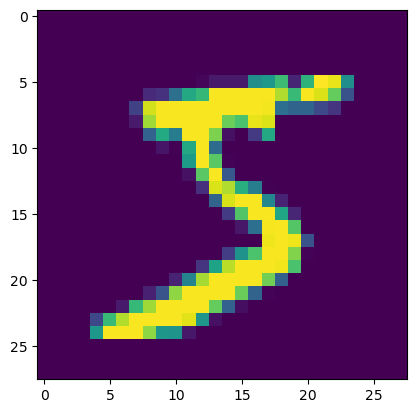

In [13]:
plt.imshow(single_image)

In [14]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(60000,)

In [17]:
y_example = to_categorical(y_train)

In [20]:
y_example[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test, 10)

In [22]:
y_cat_train = to_categorical(y_train, 10)

In [24]:
X_train = X_train / 255
X_test = X_test / 255

In [25]:
X_train = X_train.reshape(60000, 28, 28, 1)

In [26]:
X_test = X_test.reshape(10000, 28, 28, 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from time import time

In [34]:
tensorboard = TensorBoard(log_dir="logs/{}".format(time()))
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [35]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
model.fit(X_train, y_cat_train, epochs=10, callbacks=[tensorboard, early_stop], validation_data=(X_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1333 - accuracy: 0.9599 - val_loss: 0.0535 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0442 - accuracy: 0.9863 - val_loss: 0.0419 - val_accuracy: 0.9862
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9909 - val_loss: 0.0347 - val_accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0182 - accuracy: 0.9943 - val_loss: 0.0442 - val_accuracy: 0.9883


In [38]:
metrices = pd.DataFrame(model.history.history)

<Axes: >

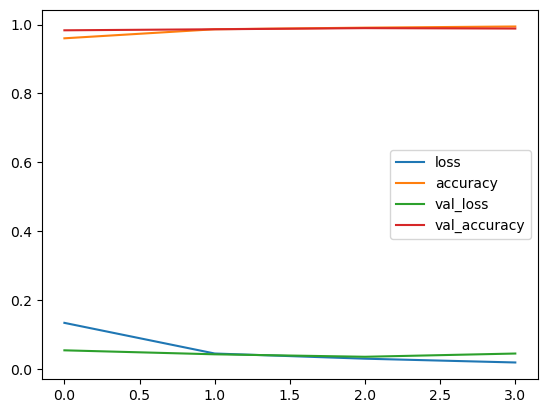

In [40]:
metrices.plot()

In [41]:
model.evaluate(X_test, y_cat_test, verbose=1)

313/313 [==============================] - 0s 803us/step - loss: 0.0442 - accuracy: 0.9883


[0.04415740445256233, 0.9883000254631042]

In [42]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 0s 783us/step


In [52]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.97      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Axes: >

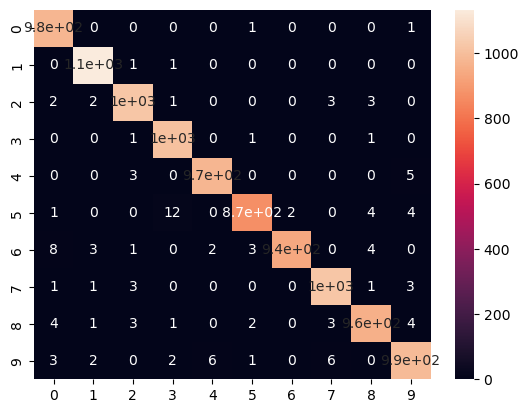

In [55]:
plt.Figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

1/1 [==============================] - 0s 9ms/step


array([0])

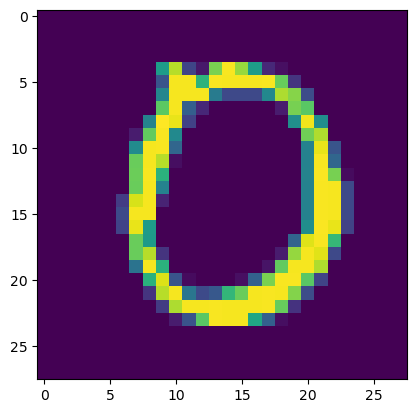

In [78]:
import random
random_value = random.randint(0,len(X_test))
plt.imshow(X_test[random_value].reshape(28,28,1))
value = np.argmax(model.predict(X_test[random_value].reshape(1,28,28,1)), axis=1)
value
